In [1]:
# Make sure helpers functionality can be imported
import os
import sys

project_path, _ = os.path.split(os.getcwd())
if project_path not in sys.path:
    sys.path.insert(0, project_path)

In [2]:
# Dependencies
# pip install numpy
# pip install pandas
# pip install sklearn

# Ignore warnings
import warnings; warnings.simplefilter("ignore")

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the random generator seed
seed = 42

## Load an experimental data

In [3]:
# Load an example dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

feature_names = dataset.feature_names
target_names = dataset.target_names

## Cross-validate an example classifier

In [4]:
from helpers.classification.validation import cross_validate_classifier
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(random_state=seed, solver="lbfgs")

# Define the classification options
threshold = 0.5
metrics = ("acc", "sen", "spe")
num_folds = 10
num_repetitions = 20

# Cross-validate the classifier
results = cross_validate_classifier(X, 
                                    y, 
                                    classifier, 
                                    threshold=threshold, 
                                    metrics=metrics, 
                                    num_folds=num_folds, 
                                    num_repetitions=num_repetitions, 
                                    seed=seed)

print("-------------------------")
print("Cross-validation results:")
print("-------------------------")
print("")

for metric in metrics:
    metric_avg = float(np.mean(results[metric]))
    metric_std = float(np.std(results[metric]))
    print("{} = {:.2f} +- {:.2f}".format(metric, metric_avg, metric_std))

-------------------------
Cross-validation results:
-------------------------

acc = 0.94 +- 0.00
sen = 0.96 +- 0.00
spe = 0.91 +- 0.01


## Plot the classification graphs

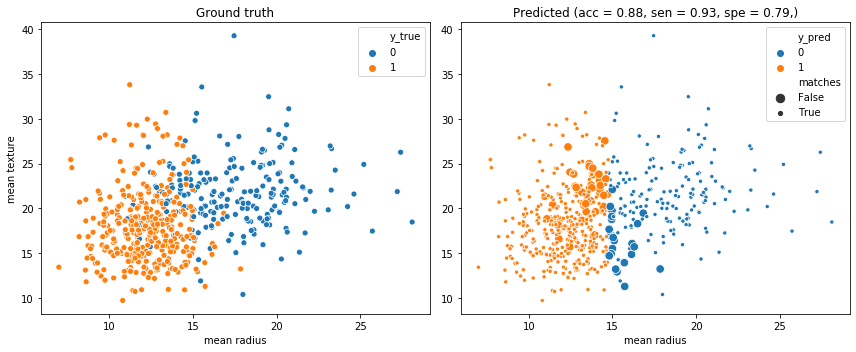

<Figure size 432x288 with 0 Axes>

In [5]:
from helpers.classification.visualization import plot_classification
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(random_state=seed, solver="lbfgs")

# Get example feature
X_dim1 = X[:, 0]
X_dim2 = X[:, 1]

X_dim1_label = feature_names[0]
X_dim2_label = feature_names[1]

# Make sure X, y are 2-dimensional
X_temp = X_dim1.reshape((len(X_dim1), 1))
y_temp = y.reshape((len(y), 1))

# Fit the classifier
classifier.fit(X_temp, y_temp)

# Evaluate the classifier
y_hat = classifier.predict(X_temp)

# Plot the classification graph
plot_classification(X_dim1,
                    X_dim2,
                    y_temp,
                    y_hat,
                    metrics=("acc", "sen", "spe"),
                    fig_size=(12, 5),
                    fig_show=False,
                    save_as=None,
                    x_label=X_dim1_label,
                    y_label=X_dim2_label)

plt.savefig("classification_plots.png", bbox_inches="tight")
plt.show()